# 1. Business Understanding

## 1.1 Objective
Predict survival on the Titanic

## 1.2 Description
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

**Before going further, what do you think is the most important reasons passangers survived the Titanic sinking?**

[Description from Kaggle](https://www.kaggle.com/c/titanic)

# 2. Data Understanding

## 2.1 Exercise: Import Libraries 
First of some preparation. We need to import python libraries containing the necessary functionality we will need. 

*Question 1: import the numpy and pandas library (10 seconds)*

In [60]:
import numpy as np
import pandas as pd

*Question 2: import sklearn library for KNN, Random Forest & Gradient Boosting ? The decision tree library is imported for you (60 seconds)* 
<br>hints: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

*Question 3: import the visualization library pyplot, seaborn & pylab? Seaborn is imported for you (30 seconds)*

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

*Question 4: import sklearn helper function train_test_split?* (60 seconds) 
<br>hints:http://scikit-learn.org/stable/modules/cross_validation.html

In [63]:
from sklearn.model_selection import train_test_split as train_test_split

#Q1
#hints: import the pandas library as pd?

#Q2
#hints: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree
from sklearn.tree import DecisionTreeClassifier

#Q3
import seaborn as sns

#Q4
#http://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.preprocessing import Imputer , Normalizer , scale

## 2.2 Setup helper Functions
There is no need to understand this code. Just run it to simplify the code later in the tutorial.

*Simply run the cell below by selecting it and pressing the play button.*

In [64]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = titanic.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
    

## 2.3 Exercise: Load data
Now that our packages are loaded, let's read in and take a peek at the data.

*Question 5a: Read the train & test csv & define them as variable $train$ & $test$.* (1 min)
<br>
train csv: https://storage.googleapis.com/bwdb/acceleratehk/10%20-%20kaggle%20class/train.csv
<br>
test csv: https://storage.googleapis.com/bwdb/acceleratehk/10%20-%20kaggle%20class/test.csv

*Question 5b: Append/concatenate the 2 csv as a variable $full$.* (5 mins)

*Question 5c: Then select the first 891 row of full and define a new variable called $titanic$* (1 min)

*Question 5d: Describe the variables using the "shape" function (1 min)*

In [65]:
df_train = pd.read_csv('https://storage.googleapis.com/bwdb/acceleratehk/10%20-%20kaggle%20class/train.csv')
df_test = pd.read_csv('https://storage.googleapis.com/bwdb/acceleratehk/10%20-%20kaggle%20class/test.csv')

In [66]:
full=[df_train, df_test]
titanic=pd.concat(full, sort=True)

In [67]:
titanic.shape

(1309, 12)

In [68]:
# get titanic & test csv files as a DataFrame
# train csv: https://storage.googleapis.com/bwdb/acceleratehk/10%20-%20kaggle%20class/train.csv
# test csv: https://storage.googleapis.com/bwdb/acceleratehk/10%20-%20kaggle%20class/test.csv

*Silly question: Check if Jack and Rose are on Titanic. They are too real to be a fiction character. How would you do it? List comprehension. Hints: Try 'Rose' in "Rose DeWitt Bukater". It shows true. How would you check if there are "Rose" in the "Name" column in dataframe "full"?* (5 mins)

In [69]:
Most_important_people_on_titanic = ['Jack Dawson',  "Rose DeWitt Bukater"]
#Let's check if they are on Titanic?

In [70]:
import re
for i in titanic['Name']:
    if re.findall(r'Jack(.)*', i) or re.findall(r'Rose(.)*',i):
        print(i)
    else:
        pass

Brewe, Dr. Arthur Jackson
Aks, Mrs. Sam (Leah Rosen)
Rosenbaum, Miss. Edith Louise
Rosenshine, Mr. George (Mr George Thorne")"


In [71]:
for person in Most_important_people_on_titanic:
    if person in titanic['Name']:
        print(True)
    else:
        print(False)

False
False


In [72]:
df_train['Name'].str.contains('Rose')
print(df_train['Name'].str.contains('Rose').sum())
print(df_train[df_train['Name'].str.contains('Rose')])

1
     PassengerId  Survived  Pclass                        Name     Sex   Age  \
855          856         1       3  Aks, Mrs. Sam (Leah Rosen)  female  18.0   

     SibSp  Parch  Ticket  Fare Cabin Embarked  
855      0      1  392091  9.35   NaN        S  


In [73]:
[true if person in titanic['Name'] else False for person in Most_important_people_on_titanic ]

[False, False]

## 2.4 Exercise: Statistical summaries and visualisations

To understand the data we are now going to consider some key facts about various variables including their relationship with the target variable, i.e. survival.



*Question 6: We start by looking at a few lines of the data. How do you do it? (10 seconds)*

In [74]:
#Q6 
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


**VARIABLE DESCRIPTIONS:**

We've got a sense of our variables, their class type, and the first few observations of each. We know we're working with 1309 observations of 12 variables. To make things a bit more explicit since a couple of the variable names aren't 100% illuminating, here's what we've got to deal with:


**Variable Description**

 - Survived: Survived (1) or died (0)
 - Pclass: Passenger's class
 - Name: Passenger's name
 - Sex: Passenger's sex
 - Age: Passenger's age
 - SibSp: Number of siblings/spouses aboard
 - Parch: Number of parents/children aboard
 - Ticket: Ticket number
 - Fare: Fare
 - Cabin: Cabin
 - Embarked: Port of embarkation

[More information on the Kaggle site](https://www.kaggle.com/c/titanic/data)

### 2.4.1 Exercise: Look at some key information about the variables
An numeric variable is one with values of integers or real numbers while a categorical variable is a variable that can take on one of a limited, and usually fixed, number of possible values, such as blood type.

Notice especially what type of variable each is, how many observations there are and some of the variable values.

An interesting observation could for example be the minimum age 0.42, do you know why this is?

*Select the cell below and run it by pressing the play button.*

*Question 7: How to quickly describe the dataframe? What does it mean? Try to explain every row to yourself* (1 mins)

In [75]:
#Q7 
titanic.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,655.000000,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN


### 2.4.2 Exercise: A heat map of correlation may give us a understanding of which variables are important
*Qusestion 8: Find the correlation matrix of titanic. (5 mins)*

hints: Check the helper's function. Alternatively, check https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas

In [76]:
#Q8
corr = titanic.corr()
corr.style.background_gradient()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1,0.17874,-0.150917,0.0288145,-0.408106,-0.243699,-0.0772211
Fare,0.17874,1,0.221539,0.0314285,-0.558629,0.160238,0.257307
Parch,-0.150917,0.221539,1,0.00894208,0.0183222,0.373587,0.0816294
PassengerId,0.0288145,0.0314285,0.00894208,1,-0.0383544,-0.055224,-0.00500666
Pclass,-0.408106,-0.558629,0.0183222,-0.0383544,1,0.060832,-0.338481
SibSp,-0.243699,0.160238,0.373587,-0.055224,0.060832,1,-0.0353225
Survived,-0.0772211,0.257307,0.0816294,-0.00500666,-0.338481,-0.0353225,1


###2.4.3 Let's further explore the relationship between the features and survival of passengers 
*Question 9 : Can you plot the the relationship between age and survival? Try use the helper's function?*

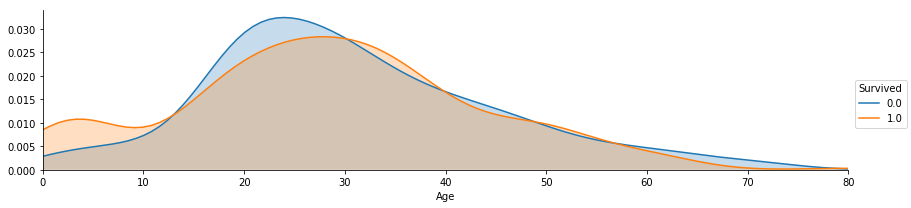

In [77]:
#Q9 Plot distributions of Age of passangers who survived or did not survive
plot_distribution(titanic , var='Age' , target='Survived')

Consider the graphs above. Differences between survival for different values is what will be used to separate the target variable (survival in this case) in the model. If the two lines had been about the same, then it would not have been a good variable for our predictive model. 

Consider some key questions such as; what age does males/females have a higher or lower probability of survival? 

### 2.4.3 Excersise : Investigating numeric variables
It's time to get your hands dirty and do some coding! 

*Question Try to plot the distributions of Fare of passangers who survived or did not survive. Then consider if this could be a good predictive variable.*

*Hint: use the code from the previous cell as a starting point.*

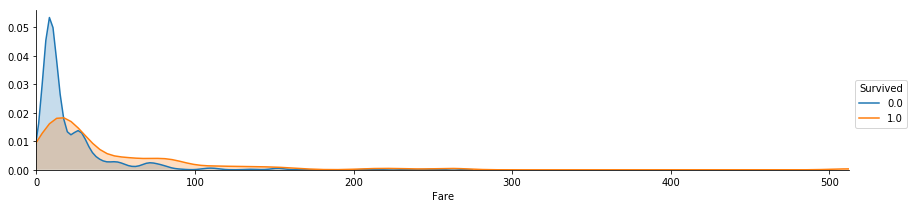

In [78]:
#Q10 Plot distributions of Fare of passangers who survived or did not survive
plot_distribution(titanic, var='Fare' , target='Survived' )


### 2.4.4 Embarked
We can also look at categorical variables like Embarked and their relationship with survival.

- C = Cherbourg  
- Q = Queenstown
- S = Southampton

C:\Users\LH772HBK\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


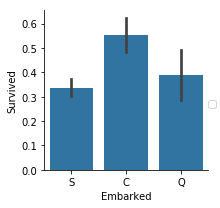

In [79]:
#Q11 Plot survival rate by Embarked. Hint: Look into the helper function?
plot_categories( titanic , cat='Embarked', target='Survived')


### 2.4.4 question 12 - 15: Investigating categorical variables
Even more coding practice! Try to plot the survival rate of Sex, Pclass, SibSp and Parch below. 

*Hint: use the code from the previous cell as a starting point.*

After considering these graphs, which variables do you expect to be good predictors of survival? 

C:\Users\LH772HBK\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


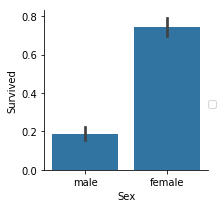

In [80]:
# Q12
# Plot survival rate by Sex
plot_categories( titanic , cat='Sex', target='Survived')

C:\Users\LH772HBK\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


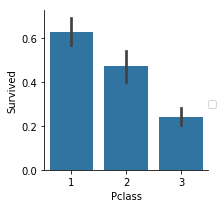

In [81]:
# Q13
# Plot survival rate by Pclass
plot_categories( titanic , cat='Pclass', target='Survived')

C:\Users\LH772HBK\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


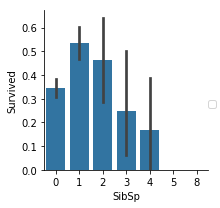

In [82]:
# Q14
# Plot survival rate by SibSp
plot_categories(titanic, cat='SibSp', target='Survived')

C:\Users\LH772HBK\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


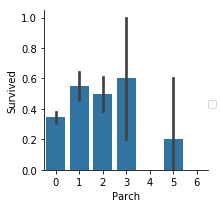

In [83]:
# Q15
# Plot survival rate by Parch
plot_categories(titanic , cat='Parch', target='Survived')

# 3. Data Preparation

## 3.1 Categorical variables need to be transformed to numeric variables
The variables *Embarked*, *Pclass* and *Sex* are treated as categorical variables. Some of our model algorithms can only handle numeric values and so we need to create a new variable (dummy variable) for every unique value of the categorical variables.

This variable will have a value 1 if the row has a particular value and a value 0 if not. *Sex* is a dichotomy (old school gender theory) and will be encoded as one binary variable (0 or 1).

*Select the cells below and run it by pressing the play button.*

*Question16: Write a function that transform male = 1 & female  = 0. You can write a function with the input as a list, or loop through a simple function that transform male to 1 & else 0. Convert $full.Sex$ to a series called $sex$ * (10 mins)

In [84]:
#Q16 Transform Sex into binary values 0 and 1
titanic['Sex']=np.where(titanic['Sex']=='female',0, 1)
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450


*Question17: Convert $full.Embarked$ to a dataframe with dummy variables and called it "Embarked". Hints: Check out pd.get_dummies*

In [85]:
#Q17 Create a new variable for every unique value of Embarked
embarked = pd.get_dummies(titanic.Embarked, prefix='Embarked')
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


*Question18: Convert $full.Pclass$ to a dataframe with dummy variables and called it "pclass". Hints: Check out pd.get_dummies*

In [86]:
#Q18 Create a new variable for every unique value of pclass
pclass= pd.get_dummies(titanic.Pclass, prefix='Pclass')
pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [87]:
imputed=pd.DataFrame()
imputed['Age']=titanic['Age'].fillna(titanic['Age'].mean())

imputed

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
5,29.881138
6,54.000000
7,2.000000
8,27.000000
9,14.000000


## 3.2 Fill missing values in variables
Most machine learning alghorims require all variables to have values in order to use it for training the model. The simplest method is to fill missing values with the average of the variable across all observations in the training set.

Hence fill in the different missing values from the table. Thereafter, do the scaling to keep the data normalised. 

# 3.2.1 Fares

*Using the same ticket number, find the mean of the sum of the same ticket number between the different ticketholders.*

In [88]:
titanic['Fare'].fillna(33.2954792813456, inplace=True)
farelst=titanic['Ticket']
farelst

a=(titanic.groupby(['Ticket']).mean())/(titanic.groupby(['Ticket']).count())
adf=zip(a.index,a.Fare)
adf=dict(adf)

titanic['Fared']=[adf[key] for key in farelst ]
titanic.head()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fared
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,7.25000
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,35.64165
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,7.92500
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,26.55000
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,8.05000


C:\Users\LH772HBK\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\LH772HBK\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fared
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,0.056604
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,0.278271
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,0.061874
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,0.207289
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,0.062850


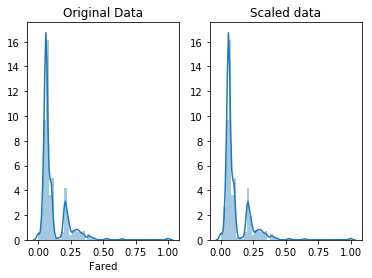

In [89]:
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns

px=titanic['Fared']

scaled_px = minmax_scaling(px, columns = [0])
titanic['Fared']=scaled_px

fig, ax=plt.subplots(1,2)

sns.distplot(px, ax=ax[0])
ax[0].set_title("Original Data")

sns.distplot(scaled_px, ax=ax[1])
ax[1].set_title("Scaled data")

titanic.head()


# 3.2.2 Age

*Making the Age more normalized. However, the age is still a bi-normal distribution.*

C:\Users\LH772HBK\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\LH772HBK\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fared
0,0.2750,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,0.056604
1,0.4750,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,0.278271
2,0.3250,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,0.061874
3,0.4375,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,0.207289
4,0.4375,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,0.062850


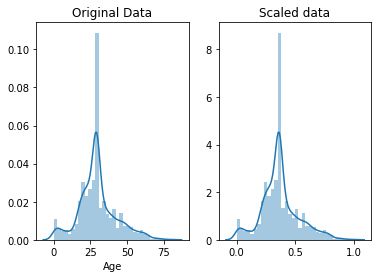

In [90]:
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns

X=titanic['Age'].fillna(titanic['Age'].mean()).astype('int64')

scaled_data = minmax_scaling(X, columns = [0])
titanic['Age']=scaled_data

fig, ax=plt.subplots(1,2)

sns.distplot(X, ax=ax[0])
ax[0].set_title("Original Data")

sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

titanic.head()

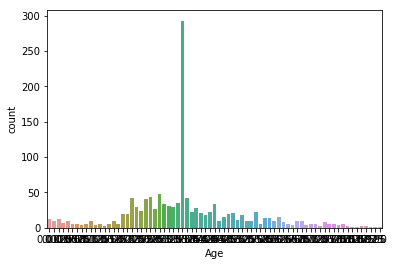

In [91]:
sns.countplot(x='Age', data=titanic)

## 3.3 Feature Engineering &ndash; Creating new variables
Credit: http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html

### 3.3.1 Extract titles from passenger names
Titles reflect social status and may predict survival probability

*Select the cell below and run it by pressing the play button.*

*Question 20: Create an empty dataframe called "title"*
<br> *Check out full[ 'Name' ]*
<br>*Question: Write a function that convert 'Gilbert, Mr. William' to 'Mr', & 'McGowan, Miss. Anna' "Annie" to "Miss", and convert all the names in full.Name, and put them in title.Title*
<br>*Question: Try to count how many Mr, Miss, Dr....etc on the boat. How do you do it? Check out pd.value_counts() *

In [92]:
#Q20
title=pd.DataFrame()

titanic.Name.head()
title['Title'] = titanic['Name'].map(lambda name: name.split( ',' )[1].split( '.' )[0].strip())
title['Surname'] = titanic['Name'].map(lambda name: name.split(',')[0])
title['Name1'] = titanic['Name'].map(lambda name: name.split( '.' )[1])

title.head()

,Title,Surname,Name1
0,Mr,Braund,Owen Harris
1,Mrs,Cumings,John Bradley (Florence Briggs Thayer)
2,Miss,Heikkinen,Laina
3,Mrs,Futrelle,Jacques Heath (Lily May Peel)
4,Mr,Allen,William Henry


In [93]:
pd.value_counts(title.Title)

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Mlle              2
Major             2
Jonkheer          1
Don               1
Sir               1
the Countess      1
Capt              1
Mme               1
Lady              1
Dona              1
Name: Title, dtype: int64

In [94]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }


*Question 21: Use the mapping table, merge the categories into a bigger categories. e.g, Ms & Mrs to "Mrs". Convert all the titles on title['Title]. How do you do it? Check out the function "map"*
<br>*Question: Convert all the title.Title to dummy variables. You should know how to do it!!*
<br>*Question: Concatenate the new dataframe to the old one. How do you do it? Hints: axis = 1*

In [95]:
#Q21
title['Title'] = title.Title.map(Title_Dictionary)
title.head()

titles=pd.get_dummies(title['Title'], prefix='Title')
titles.head()

,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


### 3.3.2 Extract Cabin category information from the Cabin number

*Select the cell below and run it by pressing the play button.*

*Question22: create an empty dataframe called 'cabin'*
<br>*Question: replace the NA value in full.Cabin to 'U', and then save it in cabin['Cabin']*
<br>*Question: mapping each Cabin value with the cabin letter. For example, C243 to "C" & D4 to "D"*
<br>*Question: again, convert the categorical data to dummy variables*

In [96]:
#Q22
import re

cabin=pd.DataFrame()

cabin['Cabin'] = titanic['Cabin'].fillna('U')
cabin['Cabin']

cabin['Location'] = cabin[ 'Cabin' ].map( lambda c : c[0] )
cabin['Location']

Locations= pd.get_dummies(cabin['Location'], prefix='Location')
Locations.head()


,Location_A,Location_B,Location_C,Location_D,Location_E,Location_F,Location_G,Location_T,Location_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


### 3.3.3 Extract ticket class from ticket number

*Question23: Create a function that clean and standardize the ticket number. For e.g, convert "C.A. 2673" & "C.A. 30769"
to "CA", or "A/5. 2151" &"A/5. 2161" to "A5". Also convert all numerical ticket to "XXX". How would you do it? (This should be the hardest question today)
<br>*Question: create an empty dataframe called "ticket" & write the cleaned full.Ticket into a new colun called "Ticket"*
<br>*Question: create a dummy variables of ticket.Ticket, and called it "ticket"*

In [97]:
#Q23
tickets=pd.DataFrame()

lista=[]
datacol1=titanic['Ticket'].map(lambda i: i.split(' ')[0])
for i in datacol1:
    a=i.replace('/','').replace('.','')
    if re.search(r'^(\d)',i):
        a='XXX'
    lista.append(a)

titanic['tickcat']=lista
titanic.head()
# a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fared,tickcat
0,0.2750,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,0.056604,A5
1,0.4750,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,0.278271,PC
2,0.3250,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,0.061874,STONO2
3,0.4375,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,0.207289,XXX
4,0.4375,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,0.062850,XXX


# 3.3.4 Create family size and category for family size
The two variables *Parch* and *SibSp* are used to create the famiy size variable

*Question24: Create an empty dataframe called "family"*

<br>* Let's create a new feature: the size of families (including the passenger).Let's called it "FamilySize". How would you do it?*
<br>* Let's create another feature called Family_Single. i.e if family size is 1. put it as a column in family*
<br>* Let's create another feature called Family_Small. i.e if family size is between 2 & 4. put it as a column in family*
<br>* Let's create another feature called Family_Large. i.e if family size is > 4. put it as a column in family*

In [98]:
#Q24
family=pd.DataFrame()

family['FamilySize']=titanic['Parch']+titanic['SibSp']+1

family['Family_Single'] = np.where(family['FamilySize']==1, 1, 0).astype('int64')
family['Family_Small'] = np.where((2<=family['FamilySize']) & (family['FamilySize']<=4), 1, 0).astype('int64')
family['Family_Large'] = np.where(4<family['FamilySize'], 1, 0).astype('int64')

family.head()

,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


## 3.4 Assemble final datasets for modelling

Split dataset by rows into test and train in order to have a holdout set to do model evaluation on. The dataset is also split by columns in a matrix (X) containing the input data and a vector (y) containing the target (or labels).

### 3.4.1 Variable selection
Select which features/variables to inculde in the dataset from the list below:

 - imputed 
 - embarked
 - pclass
 - sex
 - family
 - cabin
 - ticket

*Include the variables you would like to use in the function below seperated by comma, then run the cell*

*Question 25: We have created a list of dataframe. Try to select sex, family and imputed, concatenate by column, and create a new dataframe called full_X? How would you do it? Check out pd.concat. What axis will you be using?*

In [99]:
#Q25 Select which features/variables to include in the dataset from the list below:
# imputed , embarked , pclass , sex , family , cabin , ticket

full_X=pd.concat([titanic['Fared'].astype('float32'),imputed.astype('float32'),pclass.astype('float32'),embarked.astype('float32'),tickets.astype('float32'),titles.astype('float32'),Locations.astype('float32'), family.astype('float32')],axis='columns')
full_X.dtypes
full_X

,Fared,Age,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,...,Location_D,Location_E,Location_F,Location_G,Location_T,Location_U,FamilySize,Family_Single,Family_Small,Family_Large
0,0.056604,22.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0
1,0.278271,38.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
2,0.061874,26.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,0.207289,35.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
4,0.062850,35.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
5,0.066038,29.881138,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
6,0.202458,54.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7,0.032909,2.000000,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,1.0
8,0.028974,27.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0
9,0.117389,14.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0


### 3.4.2 Create datasets
Below we will seperate the data into training and test datasets.

*Select the cell below and run it by pressing the play button.*

*Question 26: Remember that our "full" dataframe is combined by both train and test set? Let's split them back to train_valid_X, train_valid_y, test_X, train_X.*

<br>*Create a dataframe called 'train_valid_X' by selecting the 0:891 rows from full_X*
<br>*Create a list called 'train_valid_y' by selecting the survive or not label from train_valid_X*
<br>*Create a dataframe called 'test_X' by selecting row 891 onwards from full_X*
<br>*Using "train_test_split", split the validation set by setting train_size = .7*

In [120]:
#Q26 Create all datasets that are necessary to train, validate and test models
X = full_X
y = titanic['Survived'].fillna('0').astype('int64')

y_valid_train=y[0:891]
X_valid_train=full_X.drop(titanic.Survived).iloc[0:891]
y_valid_train=y[0:891]
X_test=full_X.drop(titanic.Survived).iloc[891:]
y_test=y[895:]

X_train, X_valid, y_train, y_valid = train_test_split(X_valid_train, y_valid_train, test_size=0.70, random_state=180)

print (full_X.shape, X_valid_train.shape, X_test.shape, X_valid.shape, y_valid_train.shape, y_test.shape, y_valid.shape)

(1309, 27) (891, 27) (414, 27) (624, 27) (891,) (414,) (624,)


### 3.4.3 Feature importance
Selecting the optimal features in the model is important. 
We will now try to evaluate what the most important variables are for the model to make the prediction.

*Try use the helper function plot_variable_importance to check on train_X & train_y, to see which features are the most importants?*

0.9737827715355806


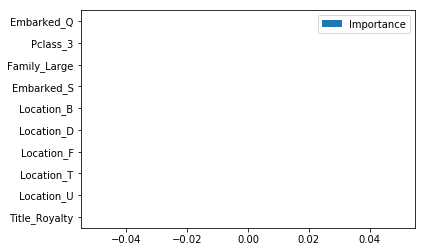

In [101]:
plot_variable_importance(X_train, y_train)

# 4. Modeling
We will now select a model we would like to try then use the training dataset to train this model and thereby check the performance of the model using the test set. 

## 4.1 Model Selection
Then there are several options to choose from when it comes to models. A good starting point is logisic regression. 

**Select ONLY the model you would like to try below and run the corresponding cell by pressing the play button.**

### 4.1.1 Random Forests Model
Try a random forest model by running the cell below. 

In [102]:
modelrfc = RandomForestClassifier(n_estimators=100)
modelrfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### 4.1.2 Support Vector Machines
Try a Support Vector Machines model by running the cell below. 

In [103]:
from sklearn.svm import SVC

modelsvc = SVC()
modelsvc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 4.1.3 Gradient Boosting Classifier
Try a Gradient Boosting Classifier model by running the cell below. 

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

modelgbc = GradientBoostingClassifier()
modelgbc

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

### 4.1.4 K-nearest neighbors
Try a k-nearest neighbors model by running the cell below. 

In [105]:
from sklearn.neighbors import KNeighborsClassifier

modelknc = KNeighborsClassifier(n_neighbors = 3)
modelknc

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### 4.1.5 Gaussian Naive Bayes
Try a Gaussian Naive Bayes model by running the cell below. 

In [106]:
from sklearn.naive_bayes import GaussianNB

modelgb = GaussianNB()
modelgb

GaussianNB(priors=None)

### 4.1.6 Logistic Regression
Try a Logistic Regression model by running the cell below. 

In [107]:
from sklearn.linear_model import LogisticRegression

modellr = LogisticRegression()
modellr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 4.2 Train the selected model
When you have selected a dataset with the features you want and a model you would like to try it is now time to train the model. After all our preparation model training is simply done with the one line below.

*Question27: How do you fit a model? try model.fit with train_X and train_y*

In [108]:
from sklearn.metrics import classification_report, confusion_matrix

In [109]:
#Q27
rfc=modelrfc.fit(X_train, y_train)

predrfc = rfc.predict(X_test)

print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

[[231 183]
 [  0   0]]
             precision    recall  f1-score   support

          0       1.00      0.56      0.72       414
          1       0.00      0.00      0.00         0

avg / total       1.00      0.56      0.72       414



C:\Users\LH772HBK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [110]:
svc=modelsvc.fit(X_train, y_train)

predsvc = svc.predict(X_test)

print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


[[329  85]
 [  0   0]]
             precision    recall  f1-score   support

          0       1.00      0.79      0.89       414
          1       0.00      0.00      0.00         0

avg / total       1.00      0.79      0.89       414



C:\Users\LH772HBK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [111]:
gbc=modelgbc.fit(X_train, y_train)

predgbc=gbc.predict(X_test)

print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

[[243 171]
 [  0   0]]
             precision    recall  f1-score   support

          0       1.00      0.59      0.74       414
          1       0.00      0.00      0.00         0

avg / total       1.00      0.59      0.74       414



C:\Users\LH772HBK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [112]:
knc=modelknc.fit(X_train, y_train)

predknc=knc.predict(X_test)

print(confusion_matrix(y_test,predknc))
print(classification_report(y_test,predknc))

[[260 154]
 [  0   0]]
             precision    recall  f1-score   support

          0       1.00      0.63      0.77       414
          1       0.00      0.00      0.00         0

avg / total       1.00      0.63      0.77       414



C:\Users\LH772HBK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [113]:
gb=modelgb.fit(X_train, y_train)

predgb=gb.predict(X_test)

print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

[[364  50]
 [  0   0]]
             precision    recall  f1-score   support

          0       1.00      0.88      0.94       414
          1       0.00      0.00      0.00         0

avg / total       1.00      0.88      0.94       414



C:\Users\LH772HBK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [114]:
lr=modellr.fit(X_train, y_train)

predlr=lr.predict(X_test)

print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

[[305 109]
 [  0   0]]
             precision    recall  f1-score   support

          0       1.00      0.74      0.85       414
          1       0.00      0.00      0.00         0

avg / total       1.00      0.74      0.85       414



C:\Users\LH772HBK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# 5. Evaluation
Now we are going to evaluate model performance and the feature importance.

## 5.1 Model performance
We can evaluate the accuracy of the model by using the validation set where we know the actual outcome. This data set have not been used for training the model, so it's completely new to the model. 

We then compare this accuracy score with the accuracy when using the model on the training data. If the difference between these are significant this is an indication of overfitting. We try to avoid this because it means the model will not generalize well to new data and is expected to perform poorly.

*Q28 how do you evaluate the model performance? Try model.score and test on train_X and train_y? and also valid_X and valid_y?*

In [115]:
#Q28 Evaluating the Model Performance

rscore=rfc.score(X_train, y_train)
sscore=svc.score(X_train, y_train)
gscore=gbc.score(X_train, y_train)
kscore=knc.score(X_train, y_train)
gscore=gb.score(X_train, y_train)
lscore=lr.score(X_train, y_train)

print(rscore,sscore,gscore,kscore,gscore,lscore)

0.9737827715355806 0.6891385767790262 0.599250936329588 0.7902621722846442 0.599250936329588 0.6254681647940075


# 5.2 Feature importance - selecting the optimal features in the model
We will now try to evaluate what the most important variables are for the model to make the prediction. The function below will only work for decision trees, so if that's the model you chose you can uncomment the code below (remove # in the beginning)  and see the feature importance.

*Question 29: Try plot_model_var_imp and check for model variance importance?*

0.9737827715355806
0.8689138576779026
None None


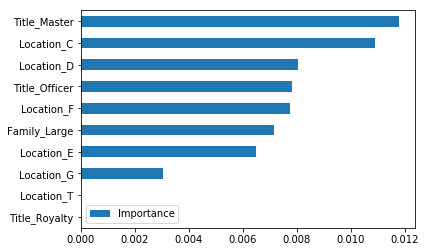

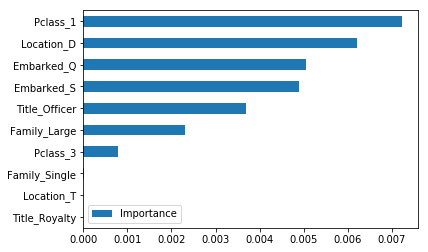

In [116]:
# Q29
rplot=plot_model_var_imp(rfc,X_train, y_train)
gplot=plot_model_var_imp(gbc,X_train, y_train)
print(rplot,gplot)


### 5.2.1 Automagic
It's also possible to automatically select the optimal number of features and visualize this. This is uncommented and can be tried in the competition part of the tutorial.

*Select the cell below and run it by pressing the play button.*

0.8539325842696629
Optimal number of features : 9
0.9737827715355806


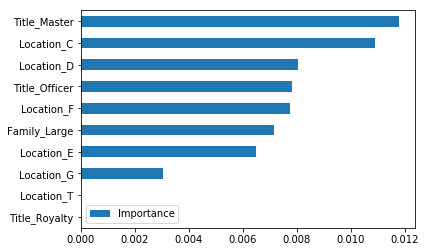

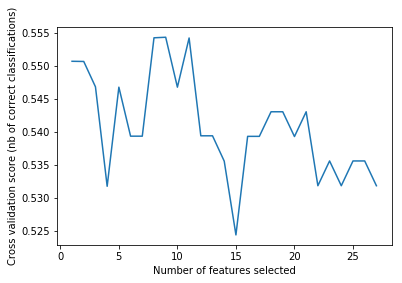

In [117]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

rfecv = RFECV( estimator = gbc , step = 1 , cv = StratifiedKFold( 2 ) , scoring = 'accuracy' )
rfecv.fit( X_train , y_train )

print (rfecv.score(X_train , y_train))
print( "Optimal number of features : %d" % rfecv.n_features_ )

rplot=plot_model_var_imp(rfc,X_train, y_train)
rscore=rfc.score(X_train, y_train)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel( "Number of features selected" )
plt.ylabel( "Cross validation score (nb of correct classifications)" )
plt.plot( range( 1 , len( rfecv.grid_scores_ ) + 1 ) , rfecv.grid_scores_ )
plt.show()

## 5.3 Competition time!
It's now time for you to get your hands even dirtier and go at it all by yourself in a `challenge`! 

1. Try to the other models in step 4.1 and compare their result
    * Do this by uncommenting the code and running the cell you want to try
2. Try adding new features in step 3.4.1
    * Do this by adding them in to the function in the feature section.


**The winner is the one to get the highest scoring model for the validation set**

*Final Question: Write a loop that loop over all the model and find out which model has the highest score?* or not.

# 6. Deployment

Deployment in this context means publishing the resulting prediction from the model to the Kaggle leaderboard. To do this do the following:

 1. select the cell below and run it by pressing the play button.
 2. Press the `Publish` button in top right corner.
 3. Select `Output` on the notebook menubar
 4. Select the result dataset and press `Submit to Competition` button

In [121]:
test_Y = rfc.predict( X_test )
passenger_id = titanic[895:].PassengerId
test = pd.DataFrame( { 'Passenger_id': passenger_id , 'Survived': (predrfc.astype('int64')) } )
test.shape
test.head()
test.to_csv( 'titanic_pred_copy.csv' , index = False )